# NAME: ALI SALEH
# ROLL NUMBER: 21L_XXXX

# PART 1: Profit EST

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [78]:
df1 = pd.read_csv("ex1data1.txt",header=None,names=['Population','Profit'])

In [79]:
df1

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


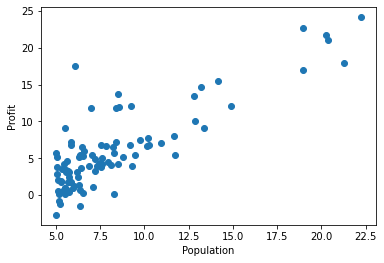

In [170]:
plt.scatter(df1.Population,df1.Profit)
plt.xlabel('Population')
plt.ylabel('Profit')

plt.show()

In [171]:
print(df1[df1['Profit'] <= 0])

    Population   Profit
30      5.2524 -1.22000
55      6.3589 -1.42110
61      5.1793 -0.74279
74      5.0269 -2.68070


In [172]:
#Discarding negative values in the dataset
df_1 = df1[df1['Profit'] >= 0]


In [173]:
X = df_1.Population
y=df_1.Profit

In [174]:
mean_x = np.mean(X)#Taking mean of both X and Y 
mean_y = np.mean(y)
# Puting in the formula
numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
#get slope and intercept
m = numerator / denominator

b = mean_y - m * mean_x


In [175]:
print("intercept is: ",round(b,3) ," and slope is :",round(m,3))

intercept is:  -3.45  and slope is : 1.161


### Plot the final data

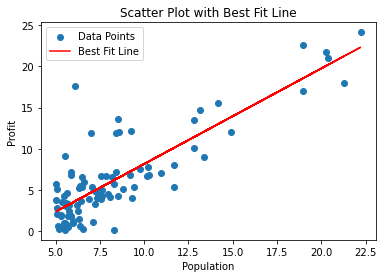

In [151]:
plt.scatter(X, y, label='Data Points')

# Best-fit line
y_pred = m * X + b
plt.plot(X, y_pred, color='red', label='Best Fit Line')

plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Scatter Plot with Best Fit Line')
plt.legend()
plt.show()

# Part 2: HOUSE PRICE EST

In [157]:
df2 = pd.read_csv("ex1data2.txt",header=None,names=['Size_in_sqfeet','num_bed','house_price'])

In [158]:
df2.head()

,Size_in_sqfeet,num_bed,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539901


In [159]:
X= df2.drop('house_price',axis=1)
y=df2.house_price

In [160]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Size_in_sqfeet  47 non-null     int64
 1   num_bed         47 non-null     int64
dtypes: int64(2)
memory usage: 880.0 bytes
None


In [161]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 47 entries, 0 to 46
Series name: house_price
Non-Null Count  Dtype
--------------  -----
47 non-null     int64
dtypes: int64(1)
memory usage: 504.0 bytes
None


In [162]:
X_intercept = pd.Series(1, index=X.index, name="X_intercept_term")

X = pd.concat([X_intercept, X], axis=1)

### Using closed form solution:

In [163]:
def lin_reg(X,y):
    X_p = np.linalg.pinv(np.dot(X.T,X))#moore penrose pseudo inverse for transpose and multiply
    
    X_y = np.dot(X.T,y)
    
    theta = np.dot(X_p,X_y)
    
    return np.linalg.inv(X.T.dot( X )).dot( X.T ).dot( y )

In [164]:
theta = lin_reg(X,y)
print("Values of theta: ",theta)

Values of theta:  [89597.82828239   139.2106998  -8738.00303701]


### Calculate price at 1650 size and 3 bedrooms

In [165]:
test_data= [1,1650,3]
price = sum(test_data *theta)
print("THE PRICE OF HOUSE: size(sqft)=1650,beds=3 => ",round(price,3))

THE PRICE OF HOUSE: size(sqft)=1650,beds=3 =>  293081.474


# Part 3: BTC EST

In [93]:
btc = pd.read_excel("coin_Bitcoin.xlsx")

In [94]:
btc.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1.0,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2.0,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3.0,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4.0,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5.0,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [99]:
btc.drop(['Open','Close'],axis=1,inplace=True)

In [121]:
btc['Target'] = (btc.High + btc.Low)/2

In [122]:
X = btc['Marketcap'].values
y=btc['Target']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [147]:
def mylinear_reg(X,y):

    mean_x = np.mean(X)
    mean_y = np.mean(y)
    
    
    above = np.sum((X - mean_x) * (y - mean_y))
    
    below = np.sum((X - mean_x) ** 2)
    slope = above / below
    
    intercept_ = mean_y - m * mean_x
    
    return slope,intercept_

In [127]:
slope,inter = mylinear_reg(X_train,y_train)
print("Slope : ",slope,"\nIntercept : ",inter)

Slope :  5.3286465112832926e-08 
Intercept :  250.49089105517123


In [130]:
y_pred = slope*X_test+inter

In [135]:
def calculate_mean_abs_error(y, y_pred):
    absolute_errors = np.abs(y - y_pred)
    return np.sum(absolute_errors) / n

In [136]:
def calculate_mean_sq_error(y, y_pred):
    squared_errors = (y - y_pred) ** 2
    return np.sum(squared_errors) / n

In [146]:
n = len(y)
abs_eror = calculate_mean_abs_error(y_test, y_pred)
sq_eror = calculate_mean_sq_error(y_test, y_pred)

print("MAE: ", round(abs_eror,4))
print("MSE: ", round(sq_eror,4))

MAE:  75.3023
MSE:  49264.5012


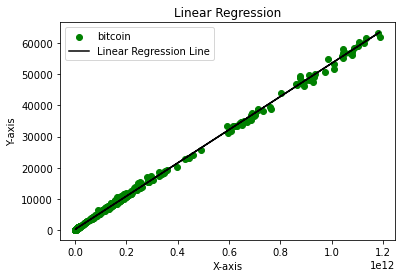

In [144]:
plt.scatter(X_test, y_test, color='green', label='bitcoin')
plt.plot(X_test, y_pred, color='black', label='Linear Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [153]:
print("=======================THE END=======================")

=======================THE END=======================
